In [1]:
import sympy
from phasor.utilities.ipynb.displays import *
from phasor.utilities.ipynb.ipy_sympy import *
import scipy.linalg


import numpy.testing as np_test
import declarative as decl
from declarative.bunch import (
    DeepBunch,
)

#import numpy as np

from phasor import system
from phasor import readouts
from phasor import optics
from phasor.optics.nonlinear_crystal import NonlinearCrystal
from phasor.utilities.print import pprint

from phasor.optics.models.KTP_test_stand import SHGTestStandResonant

asavefig.formats.jpg.use = True

Populating the interactive namespace from numpy and matplotlib
Sympy version:  1.0


In [2]:
db = DeepBunch()
db.test.ktp.length.val = np.linspace(0, .4, 100)
db.test.ktp.N_ode = 30
db.test.PSLR.power.val = .4
db.test.ktp.solution_order = 4
db.test.include_AC = False
sys = system.BGSystem(
    ctree = db,
)
sys.own.test = SHGTestStandResonant()
db = sys.ctree_shadow()
#print(sys.test.ktp.ctree_as_yaml())

In [3]:
#print(sys.test.DC_R.DC_readout)
#print(sys.test.DC_G.DC_readout)

Number of states:  4
Number of states:  4


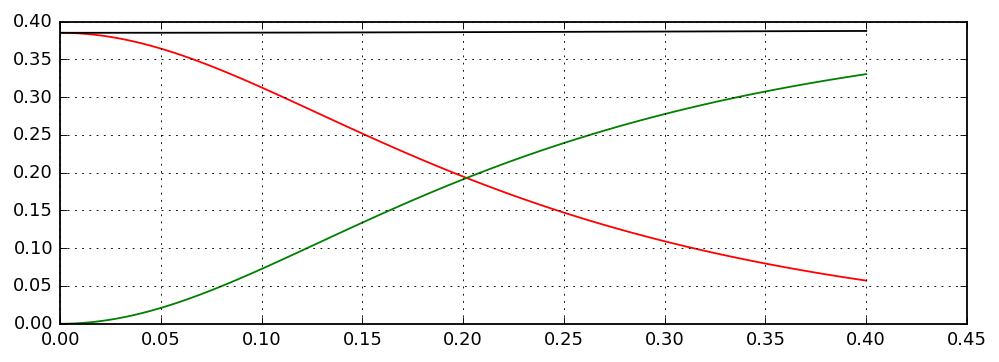

In [4]:
axB = mplfigB(Nrows=1)
test = sys.test
axB.ax0.plot(test.ktp.length_mm.val, test.DC_R.DC_readout, color = 'red')
axB.ax0.plot(test.ktp.length_mm.val, test.DC_G.DC_readout, color = 'green')
axB.ax0.plot(test.ktp.length_mm.val, test.DC_R.DC_readout + test.DC_G.DC_readout, color = 'black')
#axB.ax0.plot(test.ktp.length_mm.val, 1 * np.tanh(.200 * test.ktp.length_mm.val)**2, ls = '--', color = 'blue')
#axB.ax0.set_xscale('log')
#axB.ax0.set_ylim(0, 1.1)

In [5]:
db = DeepBunch()
db.test.ktp.length.val = .12
db.test.ktp.N_ode = 10
db.test.mDC1.mirror_H1.T_hr = .03
db.test.mDC2.mirror_H1.L_hr = .01
db.test.PSLR.power.val = np.linspace(0, .5, 30)
db.test.ktp.solution_order = 4
db.test.include_AC = True 
sys = system.BGSystem(
    ctree = db,
)
sys.own.test = SHGTestStandResonant()
db = sys.ctree_shadow()
#print(sys.test.ktp.ctree_as_yaml())
print(db.test.mDC1.mirror_H1.T_hr)

0.03


Number of states:  20
Number of states:  20


/home/mcculler/.local/lib/python3.5/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide
/home/mcculler/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide
/usr/lib64/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/mcculler/local/home_sync/projects/phasor/phasor/readouts/homodyne_AC.py:158: RuntimeWarning: invalid value encountered in true_divide
  ratio          = ((NIQ[1, 0] > 0)*2 - 1) * np.sqrt(disc / (max_eig - min_eig))


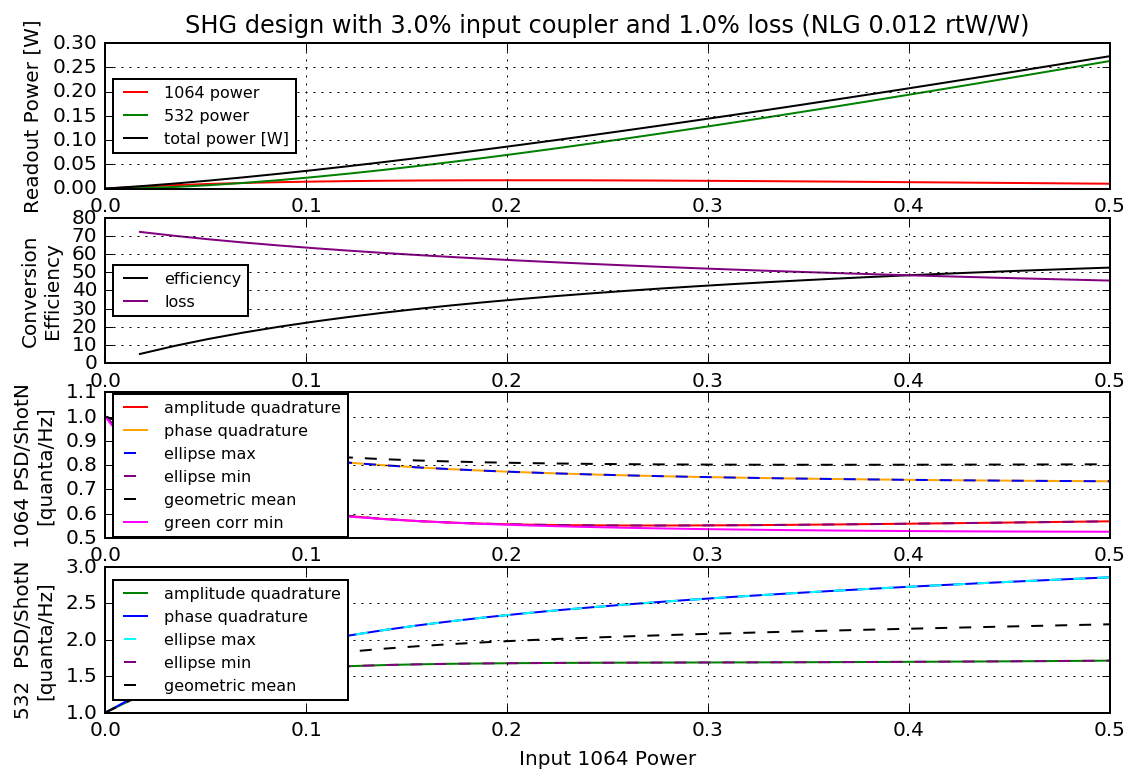

In [6]:
def plot_power_study(test):
    axB = mplfigB(Nrows=4)
    X_NLG = test.PSLR.power_W.val
    axB.ax0.plot(
        X_NLG,
        test.DC_R.DC_readout,
        color = 'red',
        label = '1064 power',
    )
    axB.ax0.plot(
        X_NLG,
        test.DC_G.DC_readout,
        color = 'green',
        label = '532 power',
    )
    axB.ax0.plot(
        X_NLG,
        test.DC_R.DC_readout + test.DC_G.DC_readout,
        color = 'black',
        label = 'total power [W]',
    )
    #axB.ax0.set_ylim(0, .5)
    axB.ax0.set_ylabel('Readout Power [W]')
    axB.ax0.legend(
        fontsize = 8,
        loc = 'center left'
    )
    axB.ax1.plot(
        X_NLG,
        100 * test.DC_G.DC_readout / test.PSLR.power_W.val,
        color = 'black',
        label = 'efficiency',
    )
    axB.ax1.plot(
        X_NLG,
        100 - 100 * (test.DC_R.DC_readout + test.DC_G.DC_readout) / test.PSLR.power_W.val,
        color = 'purple',
        label = 'loss',
    )
    axB.ax1.set_ylabel('Conversion\nEfficiency')
    axB.ax1.legend(
        fontsize = 8,
        loc = 'center left'
    )
    axB.ax2.plot(
        X_NLG,
        test.AC_R.AC_CSD_IQ[0, 0],
        color = 'red',
        label = 'amplitude quadrature',
    )
    axB.ax2.plot(
        X_NLG,
        test.AC_R.AC_CSD_IQ[1, 1],
        color = 'orange',
        label = 'phase quadrature',
    )
    axB.ax2.plot(
        X_NLG,
        test.AC_R.AC_CSD_ellipse.max,
        color = 'blue',
        label = 'ellipse max',
        ls = '--'
    )
    axB.ax2.plot(
        X_NLG,
        test.AC_R.AC_CSD_ellipse.min,
        color = 'purple',
        label = 'ellipse min',
        ls = '--',
    )
    axB.ax2.plot(
        X_NLG,
        test.AC_R.AC_CSD_ellipse.min**.25 * test.AC_R.AC_CSD_ellipse.max**.25,
        color = 'black',
        ls = '--',
        label = 'geometric mean',
    )
    axB.ax2.plot(
        X_NLG,
        test.AC_RGI.AC_CSD_ellipse.Imin,
        color = 'magenta',
        ls = '-',
        label = 'green corr min',
    )
    axB.ax2.set_ylabel('1064 PSD/ShotN\n[quanta/Hz]')
    #axB.ax2.set_yscale('log')
    axB.ax2.legend(
        fontsize = 8,
        loc = 'center left'
    )
    axB.ax3.set_ylabel('532  PSD/ShotN\n[quanta/Hz]')
    axB.ax3.plot(
        X_NLG,
        test.AC_G.AC_CSD_IQ[0, 0],
        color = 'green',
        label = 'amplitude quadrature',
    )
    axB.ax3.plot(
        X_NLG,
        test.AC_G.AC_CSD_IQ[1, 1],
        color = 'blue',
        label = 'phase quadrature',
    )
    axB.ax3.plot(
        X_NLG,
        test.AC_G.AC_CSD_ellipse.max,
        color = 'cyan',
        label = 'ellipse max',
        ls = '--',
    )
    axB.ax3.plot(
        X_NLG,
        test.AC_G.AC_CSD_ellipse.min,
        color = 'purple',
        label = 'ellipse min',
        ls = '--',
    )
    axB.ax3.plot(
        X_NLG,
        test.AC_G.AC_CSD_ellipse.min**.5 * test.AC_G.AC_CSD_ellipse.max**.5,
        color = 'black',
        label = 'geometric mean',
        ls = '--',
    )
    axB.ax3.set_xlabel('Input 1064 Power')
    axB.ax3.legend(
        fontsize = 8,
        loc = 'center left'
    )
    tkwarg = dict(
        inperc = 100 * test.mDC1.mirror_H1.T_hr,
        Lperc = 100 * test.mDC2.mirror_H1.L_hr,
        NLG = test.ktp.nlg * test.ktp.length_mm.val,
    )
    axB.ax0.set_title(
        'SHG design with {inperc}% input coupler and {Lperc}% loss (NLG {NLG} rtW/W)'.format(**tkwarg)
    )
    axB.save(
        'SHGpwr-{inperc}%IT-{Lperc}%IL-{NLG}NLG'.format(**tkwarg)
    )
    return axB
axB = plot_power_study(sys.test)

study!
Number of states:  20
Number of states:  20


/home/mcculler/.local/lib/python3.5/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide
/home/mcculler/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide
/usr/lib64/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/mcculler/local/home_sync/projects/phasor/phasor/readouts/homodyne_AC.py:158: RuntimeWarning: invalid value encountered in true_divide
  ratio          = ((NIQ[1, 0] > 0)*2 - 1) * np.sqrt(disc / (max_eig - min_eig))


study!
Number of states:  20
Number of states:  20
study!
Number of states:  20
Number of states:  20
study!
Number of states:  20
Number of states:  20
study!
Number of states:  20
Number of states:  20
study!
Number of states:  20
Number of states:  20


Bunch(
    'ax0' = <matplotlib.axes._subplots.AxesSubplot at 0x7f4af1824c88>,
    'ax0_0' = <matplotlib.axes._subplots.AxesSubplot at 0x7f4af1824c88>,
    'ax1' = <matplotlib.axes._subplots.AxesSubplot at 0x7f4af1832048>,
    'ax1_0' = <matplotlib.axes._subplots.AxesSubplot at 0x7f4af1832048>,
    'ax2' = <matplotlib.axes._subplots.AxesSubplot at 0x7f4af179cf60>,
    'ax2_0' = <matplotlib.axes._subplots.AxesSubplot at 0x7f4af179cf60>,
    'ax3' = <matplotlib.axes._subplots.AxesSubplot at 0x7f4af17ac278>,
    'ax3_0' = <matplotlib.axes._subplots.AxesSubplot at 0x7f4af17ac278>,
    'ax_bottom' = <matplotlib.axes._subplots.AxesSubplot at 0x7f4af17ac278>,
    'ax_grid_colrow' = [[<matplotlib.axes._subplots.AxesSubplot at 0x7f4af1824c88>,
    'ax_list' = [<matplotlib.axes._subplots.AxesSubplot at 0x7f4af1824c88>,
    'ax_list_0' = [<matplotlib.axes._subplots.AxesSubplot at 0x7f4af1824c88>,
    'ax_top' = <matplotlib.axes._subplots.AxesSubplot at 0x7f4af1824c88>,
    'fig' = <matplotlib.figu

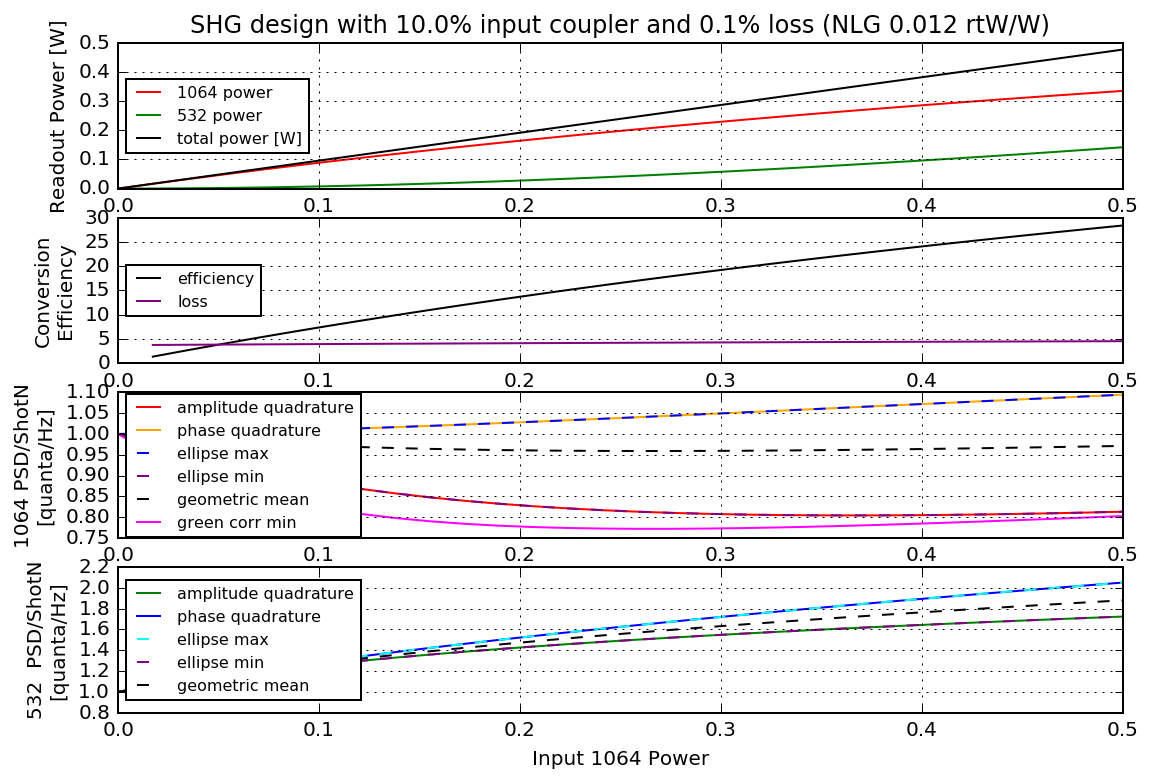

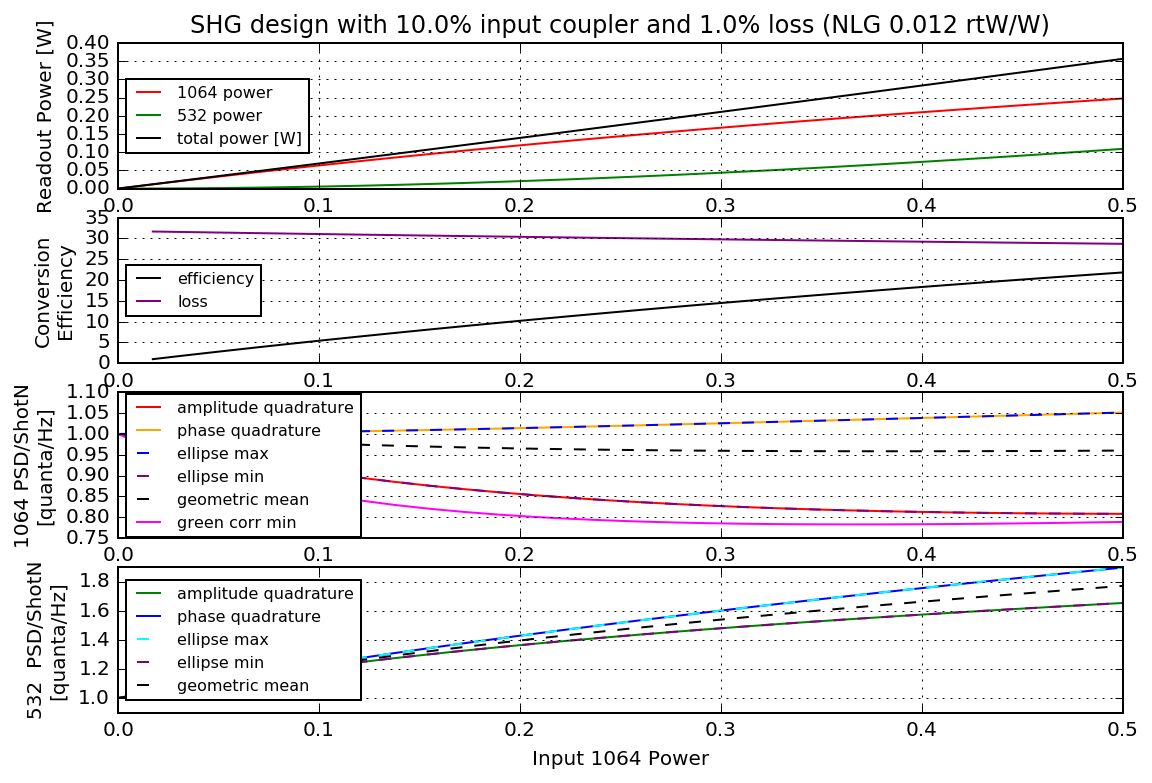

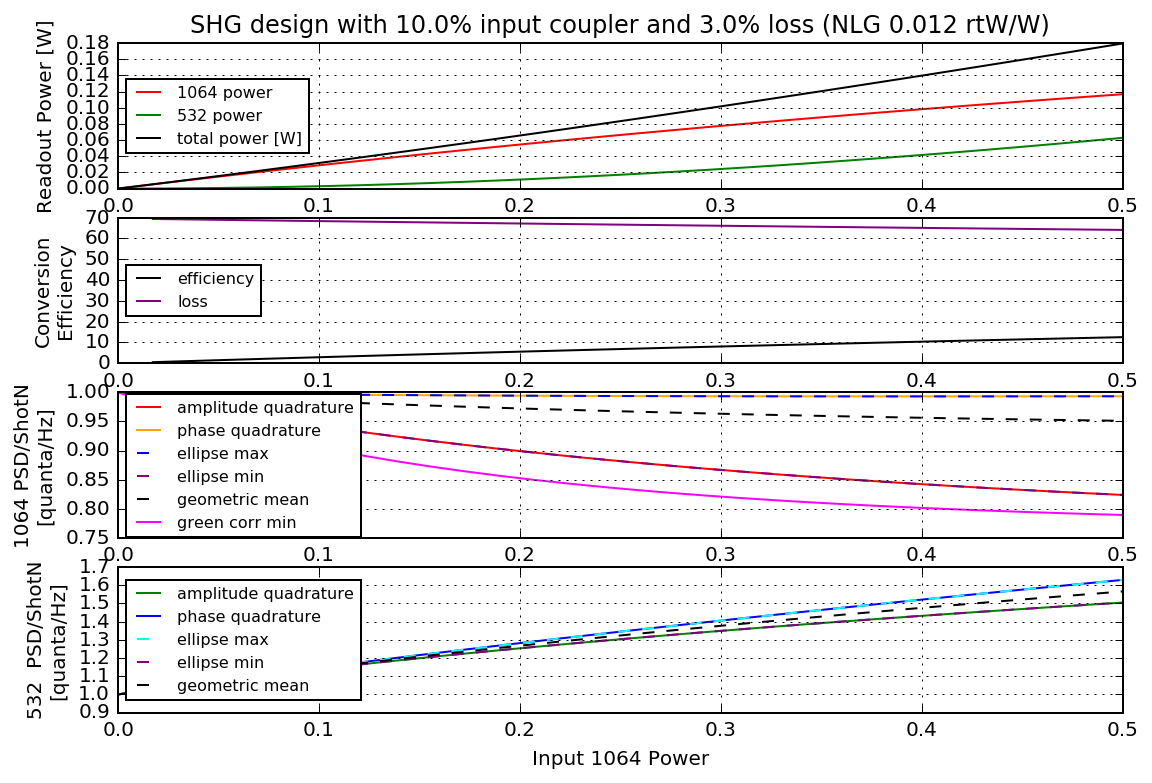

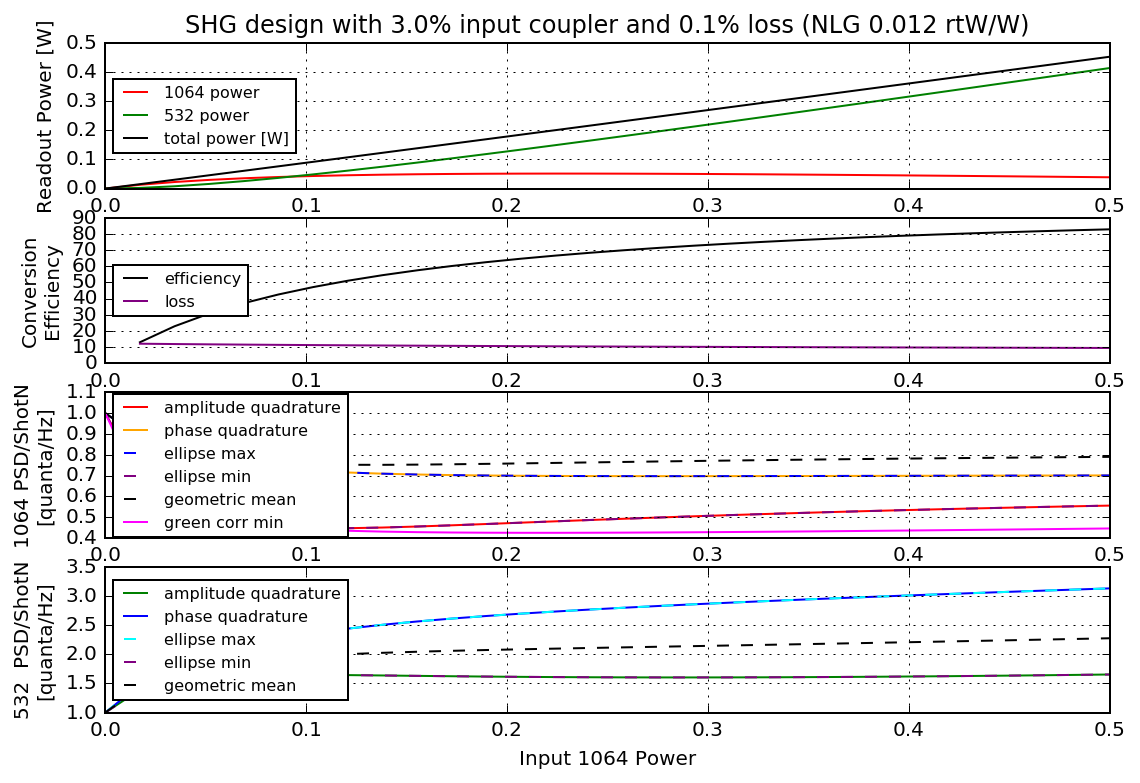

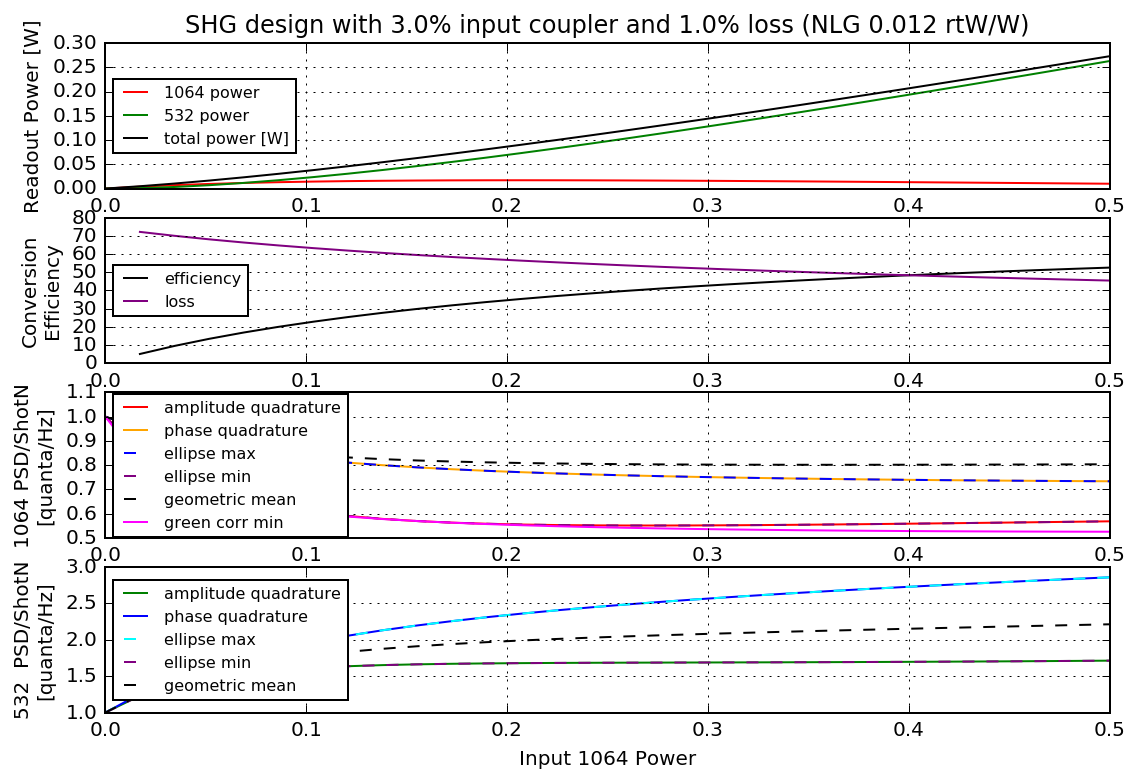

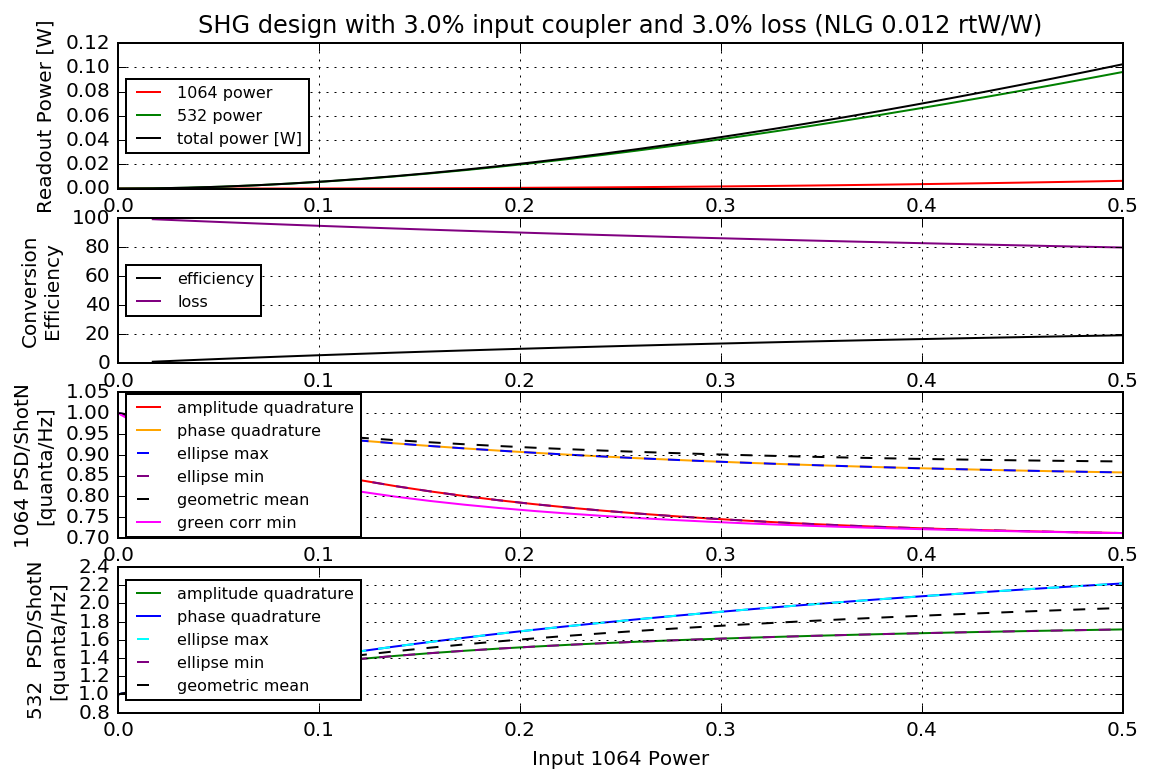

In [7]:
def generate_study(
    T_hr = .03,
    L_hr = .01,
):
    db = DeepBunch()
    db.test.ktp.length.val = .12
    db.test.ktp.N_ode = 10
    db.test.mDC1.mirror_H1.T_hr = T_hr
    db.test.mDC2.mirror_H1.L_hr = L_hr
    db.test.PSLR.power.val = np.linspace(0, .5, 30)
    db.test.ktp.solution_order = 4
    db.test.include_AC = True 
    sys = system.BGSystem(
        ctree = db,
    )
    sys.own.test = SHGTestStandResonant()
    print("study!")
    axB = plot_power_study(sys.test)
    return axB
generate_study(
    T_hr = .1,
    L_hr = .001,
)
generate_study(
    T_hr = .1,
    L_hr = .01,
)
generate_study(
    T_hr = .1,
    L_hr = .03,
)
generate_study(
    T_hr = .03,
    L_hr = .001,
)
generate_study(
    T_hr = .03,
    L_hr = .01,
)
generate_study(
    T_hr = .03,
    L_hr = .03,
)

In [21]:
def plot_loss_study(test, save = True):
    axB = mplfigB(Nrows=4)
    X_NLG = test.mDC2.mirror_H1.L_hr
    axB.ax0.plot(
        X_NLG,
        test.DC_R.DC_readout,
        color = 'red',
        label = '1064 power',
    )
    axB.ax0.plot(
        X_NLG,
        test.DC_G.DC_readout,
        color = 'green',
        label = '532 power',
    )
    axB.ax0.plot(
        X_NLG,
        test.DC_R.DC_readout + test.DC_G.DC_readout,
        color = 'black',
        label = 'total power [W]',
    )
    #axB.ax0.set_ylim(0, .5)
    axB.ax0.set_ylabel('Readout Power [W]')
    axB.ax0.legend(
        fontsize = 8,
        loc = 'upper right'
    )
    axB.ax1.plot(
        X_NLG,
        100 * test.DC_G.DC_readout / test.PSLR.power_W.val,
        color = 'black',
        label = 'efficiency',
    )
    axB.ax1.plot(
        X_NLG,
        100 - 100 * (test.DC_R.DC_readout + test.DC_G.DC_readout) / test.PSLR.power_W.val,
        color = 'purple',
        label = 'loss',
    )
    axB.ax1.set_ylabel('Conversion\nEfficiency')
    axB.ax1.legend(
        fontsize = 8,
        loc = 'upper right'
    )
    axB.ax2.plot(
        X_NLG,
        test.AC_R.AC_CSD_IQ[0, 0],
        color = 'red',
        label = 'amplitude quadrature',
    )
    axB.ax2.plot(
        X_NLG,
        test.AC_R.AC_CSD_IQ[1, 1],
        color = 'orange',
        label = 'phase quadrature',
    )
    axB.ax2.plot(
        X_NLG,
        test.AC_R.AC_CSD_ellipse.max,
        color = 'blue',
        label = 'ellipse max',
        ls = '--'
    )
    axB.ax2.plot(
        X_NLG,
        test.AC_R.AC_CSD_ellipse.min,
        color = 'purple',
        label = 'ellipse min',
        ls = '--',
    )
    axB.ax2.plot(
        X_NLG,
        test.AC_R.AC_CSD_ellipse.min**.25 * test.AC_R.AC_CSD_ellipse.max**.25,
        color = 'black',
        ls = '--',
        label = 'geometric mean',
    )
    axB.ax2.plot(
        X_NLG,
        test.AC_RGI.AC_CSD_ellipse.Imin,
        color = 'magenta',
        ls = '-',
        label = 'green corr min',
    )
    axB.ax2.plot(
        X_NLG,
        test.AC_RGQ.AC_CSD_ellipse.Imin,
        color = 'magenta',
        ls = '-',
        label = 'green corrQ min',
    )
    axB.ax2.set_ylabel('1064 PSD/ShotN\n[quanta/Hz]')
    #axB.ax2.set_yscale('log')
    axB.ax2.legend(
        fontsize = 8,
        loc = 'upper right'
    )
    axB.ax3.set_ylabel('532  PSD/ShotN\n[quanta/Hz]')
    axB.ax3.plot(
        X_NLG,
        test.AC_G.AC_CSD_IQ[0, 0],
        color = 'green',
        label = 'amplitude quadrature',
    )
    axB.ax3.plot(
        X_NLG,
        test.AC_G.AC_CSD_IQ[1, 1],
        color = 'blue',
        label = 'phase quadrature',
    )
    axB.ax3.plot(
        X_NLG,
        test.AC_G.AC_CSD_ellipse.max,
        color = 'cyan',
        label = 'ellipse max',
        ls = '--',
    )
    axB.ax3.plot(
        X_NLG,
        test.AC_G.AC_CSD_ellipse.min,
        color = 'purple',
        label = 'ellipse min',
        ls = '--',
    )
    axB.ax3.plot(
        X_NLG,
        test.AC_G.AC_CSD_ellipse.min**.5 * test.AC_G.AC_CSD_ellipse.max**.5,
        color = 'black',
        label = 'geometric mean',
        ls = '--',
    )
    axB.ax3.set_xlabel('Red Cavity Loss')
    axB.ax3.legend(
        fontsize = 8,
        loc = 'upper right'
    )
    tkwarg = dict(
        inperc = 100 * test.mDC1.mirror_H1.T_hr,
        mW = 1000 * test.PSLR.power_W.val,
        NLG = test.ktp.nlg * test.ktp.length_mm.val,
    )
    axB.ax0.set_title(
        'SHG design with {inperc}% input coupler {mW}mW (NLG {NLG} rtW/W)'.format(**tkwarg)
    )
    axB.ax0.set_xscale('log_zoom')
    axB.ax1.set_xscale('log_zoom')
    axB.ax2.set_xscale('log_zoom')
    axB.ax3.set_xscale('log_zoom')
    if save:
        axB.save(
            'SHGloss-{inperc}%IT-{mW}%mW-{NLG}NLG'.format(**tkwarg)
        )
    return axB

0.1


/usr/lib64/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


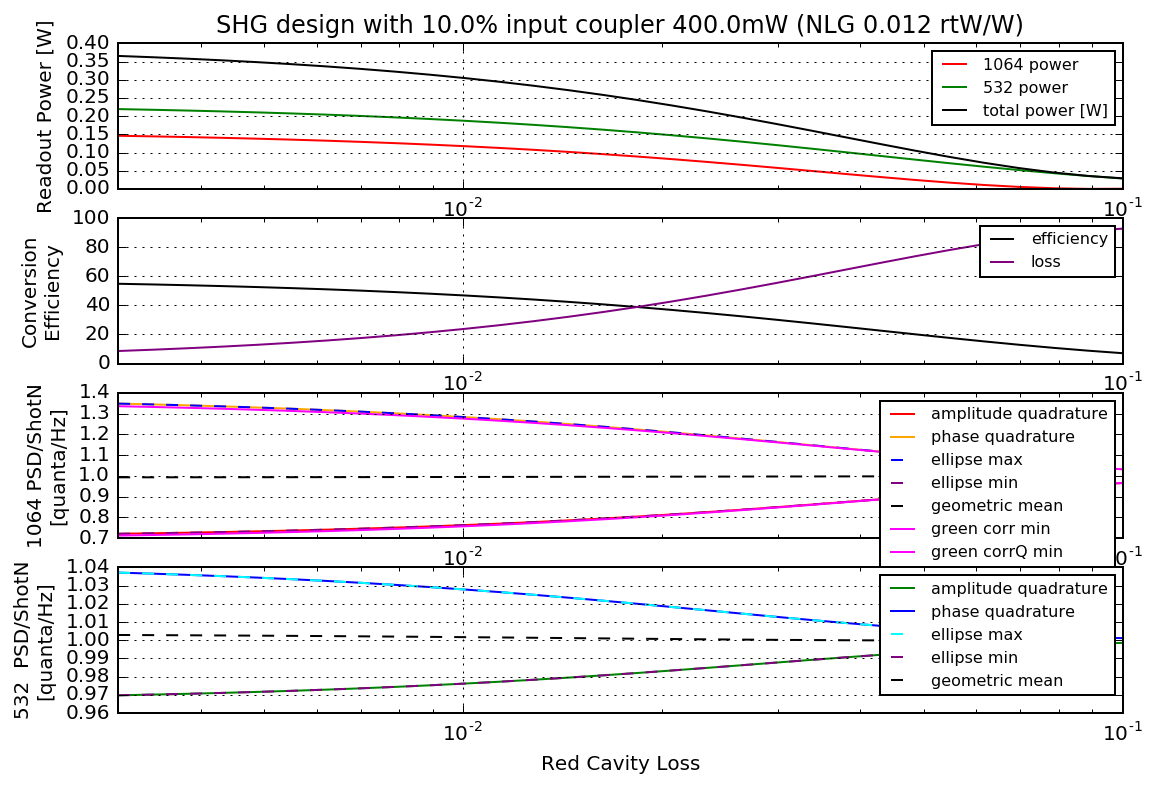

In [22]:
from phasor.optics.models.KTP_test_stand import SHGTestStandResonant
db = DeepBunch()
db.test.ktp.length.val = .12
db.test.ktp.N_ode = 10
db.test.mDC1.mirror_H1.T_hr = .1
db.test.mDC2.mirror_H1.L_hr = logspaced(.003, .1, 30)
db.test.PSLR.power.val = .4
db.test.ktp.solution_order = 4
db.test.include_AC = True 
sys = system.BGSystem(
    ctree = db,
)
sys.own.test = SHGTestStandResonant()
db = sys.ctree_shadow()
#print(sys.test.ktp.ctree_as_yaml())
print(db.test.mDC1.mirror_H1.T_hr)
axB = plot_loss_study(sys.test)

0.03


/usr/lib64/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


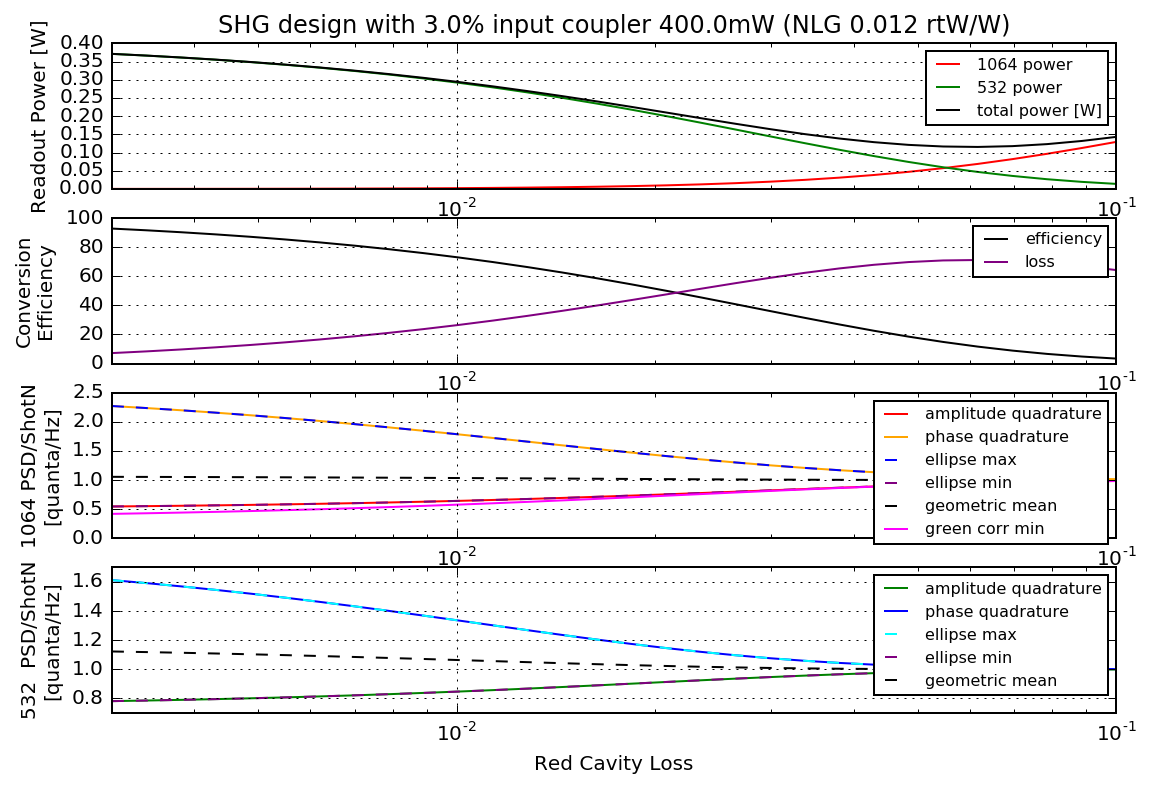

In [11]:
from phasor.optics.models.KTP_test_stand import SHGTestStandResonant
db = DeepBunch()
db.test.ktp.length.val = .12
db.test.ktp.N_ode = 10
db.test.mDC1.mirror_H1.T_hr = .03
db.test.mDC2.mirror_H1.L_hr = logspaced(.003, .1, 30)
db.test.PSLR.power.val = .4
db.test.ktp.solution_order = 4
db.test.include_AC = True 
sys = system.BGSystem(
    ctree = db,
)
sys.own.test = SHGTestStandResonant()
db = sys.ctree_shadow()
#print(sys.test.ktp.ctree_as_yaml())
print(db.test.mDC1.mirror_H1.T_hr)
axB = plot_loss_study(sys.test)

0.1


/usr/lib64/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


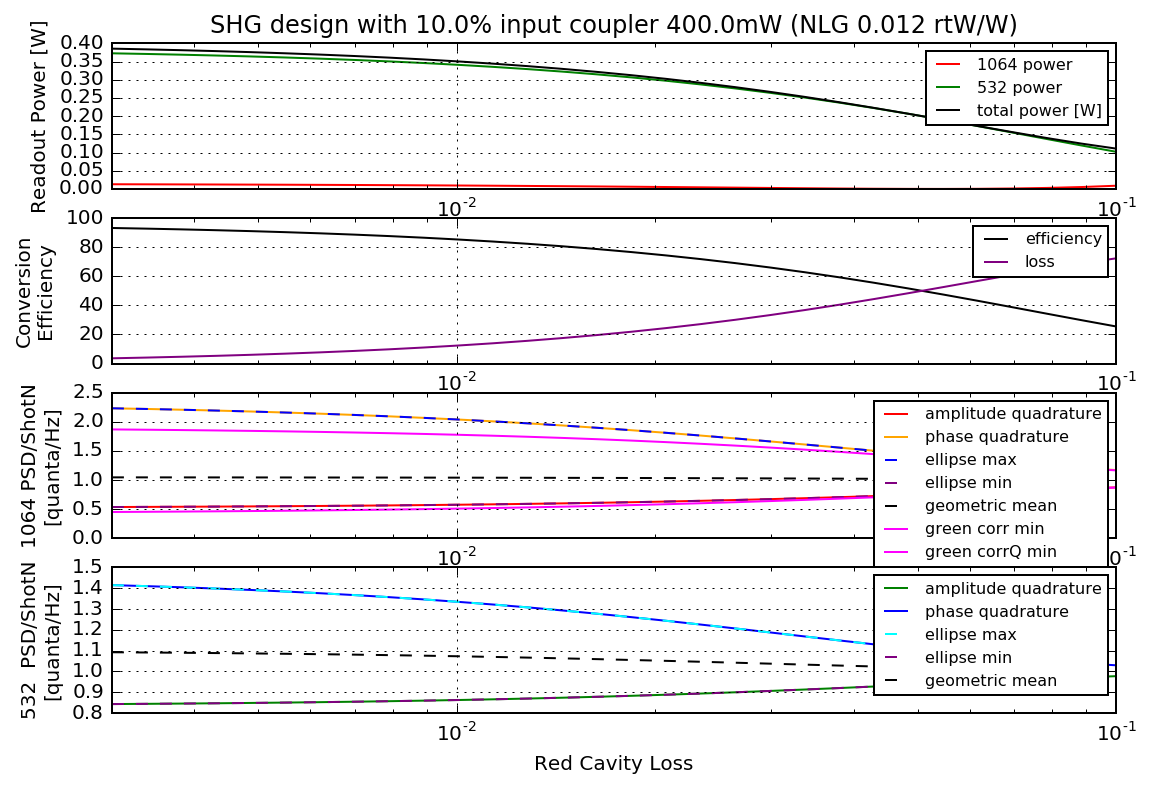

In [23]:
from phasor.optics.models.KTP_test_stand import SHGTestStandResonant
db = DeepBunch()
db.test.ktp.length.val = .12
db.test.ktp.N_ode = 10
db.test.mDC1.mirror_H1.T_hr = .1
db.test.mDC2.mirror_H1.L_hr = logspaced(.003, .1, 30)
db.test.PSLR.power.val = .4
db.test.ktp.solution_order = 4
db.test.include_AC = True 
db.test.mirror_gres.T_hr = .5
sys = system.BGSystem(
    ctree = db,
)
sys.own.test = SHGTestStandResonant()
db = sys.ctree_shadow()
#print(sys.test.ktp.ctree_as_yaml())
print(db.test.mDC1.mirror_H1.T_hr)
axB = plot_loss_study(sys.test, save = False)
axB.save('SHGlossResGrn-10ic-50gc-400mW')

In [42]:
from phasor.optics.models.KTP_test_stand import SHGTestStandResonant
db = DeepBunch()
db.test.ktp.length.val = .12
db.test.ktp.N_ode = 10
db.test.mDC1.mirror_H1.T_hr = .1
db.test.mDC2.mirror_H1.L_hr = logspaced(.003, .1, 30)
db.test.PSLR.power.val = .1
db.test.ktp.solution_order = 4
db.test.include_AC = True 
db.test.mirror_gres.T_hr = .1
sys = system.BGSystem(
    ctree = db,
)
sys.own.test = SHGTestStandResonant()
db = sys.ctree_shadow()
#print(sys.test.ktp.ctree_as_yaml())
print(db.test.mDC1.mirror_H1.T_hr)
axB = plot_loss_study(sys.test, save = False)
axB.save('SHGlossResGrn-10ic-10gc-100mW')

0.1


/usr/lib64/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [50]:
sys.test.AC_RGQ.AC_CSD_ellipse.Imin * sys.test.AC_RGI.AC_CSD_ellipse.Imin

array([ 0.75925894,  0.76429681,  0.76989266,  0.77609525,  0.78295395,
        0.79051756,  0.79883273,  0.80794188,  0.8178806 ,  0.82867443,
        0.84033496,  0.85285527,  0.86620465,  0.88032292,  0.89511431,
        0.91044163,  0.92612111,  0.94191898,  0.95755084,  0.97268535,
        0.98695359,  0.99996563,  1.01133509,  1.02071137,  1.02781769,
        1.03249058,  1.0347144 ,  1.03464262,  1.0325979 ,  1.02904565])

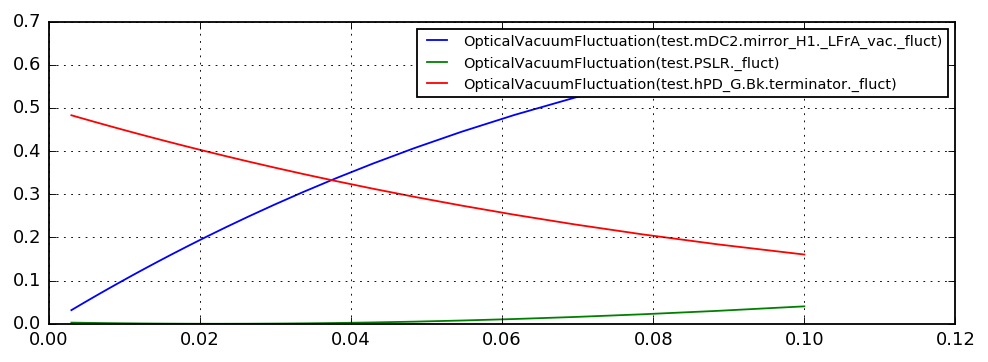

In [14]:
axB = mplfigB()
for src, CSD in sys.test.AC_R.noise.CSD_by_source.items():
    if not np.all(CSD['ps_In', 'ps_In'] == 0):
        axB.ax0.plot(
            sys.test.mDC2.mirror_H1.L_hr, 
            np.ones_like(sys.test.mDC2.mirror_H1.L_hr) * CSD['ps_In', 'ps_In'].real,
            label = str(src),
        )
axB.ax0.legend(
    fontsize = 8,
)
    

In [40]:
from phasor.optics.models.KTP_test_stand import SHGTestStandResonant
db = DeepBunch()
db.test.ktp.length.val = .12
db.test.ktp.N_ode = 10
db.test.mDC1.mirror_H1.T_hr = .1
db.test.mDC2.mirror_H1.L_hr = .001
db.test.PSLR.power.val = .1
db.test.ktp.solution_order = 4
db.test.include_AC = True 
db.test.mirror_gres.T_hr = .1
db.test.mirror_gres.L_hr = .01
sys = system.BGSystem(
    ctree = db,
)
sys.own.test = SHGTestStandResonant()
db = sys.ctree_shadow()
#print(sys.test.ktp.ctree_as_yaml())
print(db.test.mDC1.mirror_H1.T_hr)
sys.test.full_noise_matrix()

0.1
          RI        RQ        GI        GQ
--  --------  --------  --------  --------
RI  0.509048   0        0.302301   0
RQ  0          2.62764  0         -1.00505
GI  0.302301   0        0.812739   0
GQ  0         -1.00505  0          1.61976


(['RI', 'RQ', 'GI', 'GQ'],
 array([[ 0.50904809,  0.        ,  0.30230143,  0.        ],
        [ 0.        ,  2.62763882,  0.        , -1.00504678],
        [ 0.30230073,  0.        ,  0.81273858,  0.        ],
        [ 0.        , -1.00504678,  0.        ,  1.61976464]]))

In [41]:
sys.test.AC_N.CSD

Bunch(
    ('GI', 'GI') = 0.812738584477,
    ('GI', 'GQ') = (4.9416093846506049e-17-0.00011573602814129655j),
    ('GI', 'RI') = (0.30230072872456537-4.941960677142644e-20j),
    ('GI', 'RQ') = (-6.1541366249221935e-17+0.0010024475165050784j),
    ('GQ', 'GI') = (4.9416093846505186e-17-0.00040141077102064798j),
    ('GQ', 'GQ') = 1.61976464098,
    ('GQ', 'RI') = (-1.8510580990623478e-17-0.000807083426919839j),
    ('GQ', 'RQ') = (-1.0050467823386844-6.1382207120219916e-20j),
    ('RI', 'GI') = (0.30230142697991802+3.5465958013985499e-20j),
    ('RI', 'GQ') = (-1.8510623746432139e-17+0.0005792030492195524j),
    ('RI', 'RI') = 0.509048088304,
    ('RI', 'RQ') = (9.3965331652878245e-31+0.00029998209664500175j),
    ('RQ', 'GI') = (-6.154136591402383e-17-0.00066081181201210759j),
    ('RQ', 'GQ') = (-1.0050467768644775+4.0463053520407026e-20j),
    ('RQ', 'RI') = (6.4270000196866772e-31+0.00084386749854348242j),
    ('RQ', 'RQ') = 2.62763882037,
    )

In [16]:
sys.test.AC_RGI.AC_CSD_ellipse

Bunch(
    'Imin' = 0.469678062905,
    'Qmin' = 0.709239272724,
    'deg' = 121.040837826,
    'max' = 0.998479451922,
    'min' = 0.394099523586,
    'rad' = 2.11256114944,
    )

In [17]:
from YALL.utilities.modpack import generate_modpack
generate_modpack()

In [18]:
10 * np.log10(.39)

In [31]:
sys.test.AC_RGQ.AC_CSD_IQ

array([[ 2.63108748 +0.00000000e+00j, -1.00753775 +7.07512473e-20j],
       [-1.00654222 +4.44581373e-20j,  1.62040218 +0.00000000e+00j]])